In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import generate_a_rectangle, generate_a_disk, generate_a_triangle
IMAGE_SIZE = 72

Using TensorFlow backend.


### <center>Sample images</center>

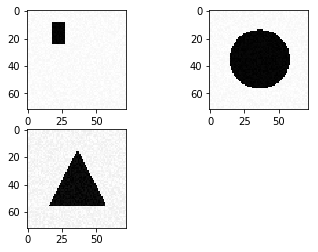

In [3]:
plt.figure()
im = generate_a_rectangle(10, True)
plt.subplot(221)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(222)
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(223)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

# 3)  Simple Classification

### <center>Training Data</center>

In [4]:
from helpers import generate_dataset_classification
from keras.utils.np_utils import to_categorical

In [5]:
[X_train, Y_train] = generate_dataset_classification(1000, 20)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [6]:
n,p = X_train.shape
print("Number of examples : {}".format(n))
print("Number of pixels : {}".format(p))
Y_train = to_categorical(Y_train, 3)

Number of examples : 1000
Number of pixels : 5184


In [7]:
y_to_class =  {0:'rectangle', 1 : 'Disk', 2 : 'Triangle'}

### <center>Model definition </center>

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [9]:
model = Sequential()
model.add(Dense(3, input_shape=(p,)))
model.add(Activation('softmax'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


### <center>With Stochastic gradient descent </center>

In [11]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])


In [12]:
model.fit(X_train, Y_train, epochs=95, batch_size=32, verbose=0)

In [13]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 119us/step - loss: 11.0006 - acc: 0.3175 - val_loss: 11.2021 - val_acc: 0.3050
Epoch 2/5
800/800 [==============================] - 0s 50us/step - loss: 11.0006 - acc: 0.3175 - val_loss: 11.2021 - val_acc: 0.3050
Epoch 3/5
800/800 [==============================] - 0s 57us/step - loss: 11.0006 - acc: 0.3175 - val_loss: 11.2021 - val_acc: 0.3050
Epoch 4/5
800/800 [==============================] - 0s 56us/step - loss: 11.0006 - acc: 0.3175 - val_loss: 11.2021 - val_acc: 0.3050
Epoch 5/5
800/800 [==============================] - 0s 56us/step - loss: 11.0006 - acc: 0.3175 - val_loss: 11.2021 - val_acc: 0.3050


### <center>With Adam </center>

In [14]:
model = Sequential()
model.add(Dense(3, input_shape=(p,)))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


### <center> Training </center>

In [16]:
model.fit(X_train, Y_train, epochs=95, batch_size=32, verbose=0)

In [17]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 140us/step - loss: 9.2332e-04 - acc: 1.0000 - val_loss: 9.2202e-04 - val_acc: 1.0000
Epoch 2/5
800/800 [==============================] - 0s 56us/step - loss: 8.9978e-04 - acc: 1.0000 - val_loss: 8.7178e-04 - val_acc: 1.0000
Epoch 3/5
800/800 [==============================] - 0s 62us/step - loss: 8.7904e-04 - acc: 1.0000 - val_loss: 8.5564e-04 - val_acc: 1.0000
Epoch 4/5
800/800 [==============================] - 0s 86us/step - loss: 8.6009e-04 - acc: 1.0000 - val_loss: 8.6810e-04 - val_acc: 1.0000
Epoch 5/5
800/800 [==============================] - 0s 72us/step - loss: 8.5298e-04 - acc: 1.0000 - val_loss: 8.5497e-04 - val_acc: 1.0000


With Adam optimizer the neural network converges to a value of the loss that is a lot lower $10^{-4} << 10$

### <center> Testing</center>

In [18]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
prediction = model.predict(X_test)
y_to_class[np.argmax(prediction)]

'Triangle'

# 4) Visualization of the Solution

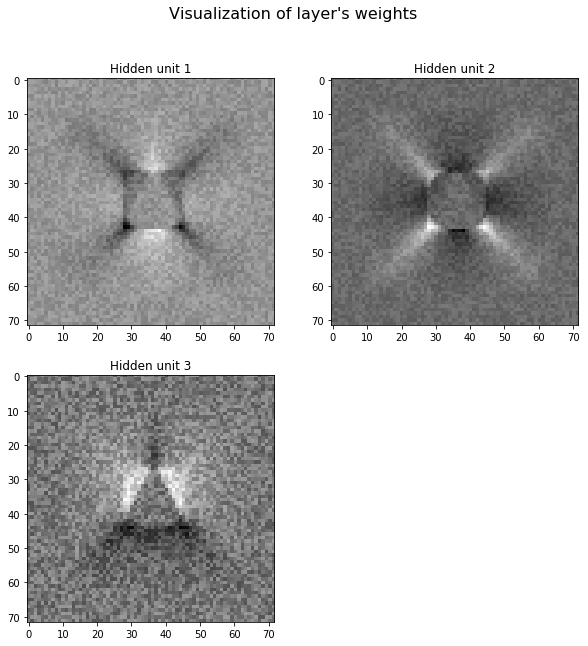

In [19]:
weights = model.get_weights()[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3)
fig = plt.figure(figsize=(10,10))
fig.suptitle("Visualization of layer's weights", fontsize=16)
ax = plt.subplot("221")
ax.set_title("Hidden unit 1")
ax.imshow(weights[:,:,0], cmap='gray')


ax = plt.subplot("222")
ax.set_title("Hidden unit 2")
ax.imshow(weights[:,:,1], cmap='gray')



ax = plt.subplot("223")
ax.set_title("Hidden unit 3")
ax.imshow(weights[:,:,2], cmap='gray')

plt.show()

We can clearly see triangle, rectangle and circle shapes. The network seems to have learned what those shapes are.

# 5) A More Difficult Classification Problem

In [20]:
from helpers import generate_test_set_classification

In [21]:
sample_size = 1000

In [22]:
[X_train, Y_train] = generate_dataset_classification(sample_size, 20, True)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [23]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200


In [24]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = to_categorical(Y_train)
X_test = X_test.reshape(300,IMAGE_SIZE,IMAGE_SIZE,1)

### <center>Visualization of the data </center>

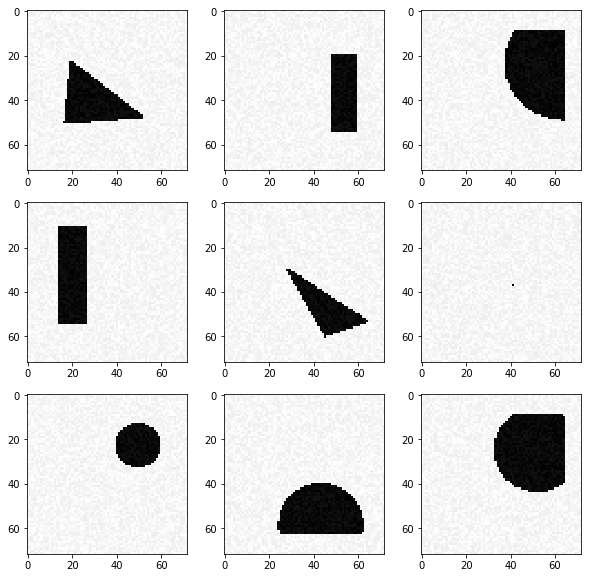

In [25]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### <center> Model definition </center>

In [26]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [27]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### <center> Training </center>

In [29]:
model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=0)

In [30]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0583 - acc: 0.9988 - val_loss: 0.0727 - val_acc: 1.0000
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0760 - acc: 0.9925 - val_loss: 0.0656 - val_acc: 0.9950
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0592 - acc: 0.9975 - val_loss: 0.0647 - val_acc: 1.0000
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0463 - acc: 0.9988 - val_loss: 0.0679 - val_acc: 0.9900
Epoch 5/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0449 - acc: 0.9988 - val_loss: 0.0567 - val_acc: 1.0000


### <center> Testing </center>

In [31]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


[0.4393653146425883, 0.8633333333333333]

0.85 accuracy on the test set is a good result compared to the 1/3 for random guess. 

# 6) A Regression Problem

### <center>Creation the data </center>

In [32]:
from helpers import generate_dataset_regression, visualize_prediction, generate_test_set_regression

In [33]:
sample_size = 5000

In [34]:
[X_train, Y_train] = generate_dataset_regression(sample_size, 20)

In [35]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
100
200


### <center> Reordering of the Data </center>

To make the problem easier for the neural network we order the 3 points in increasing order of distance to the origin.

In [36]:
def reorder(Z):
    for k in range(Z.shape[0]):
        Y = Z[k]
        tuples = [(Y[i],Y[i+1]) for i in range(0,6,2)]
        sorted_tuples = sorted(tuples, key= lambda x:np.sqrt(x[0]**2 + x[1]**2))
        y_ordered = []
        for tple in sorted_tuples:
            y_ordered.append(tple[0])
            y_ordered.append(tple[1])
        Z[k] = y_ordered
    return Z

In [37]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = reorder(Y_train)


In [38]:
X_test = X_test.reshape(300,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = reorder(Y_test)

### <center>Visualization of the data </center>

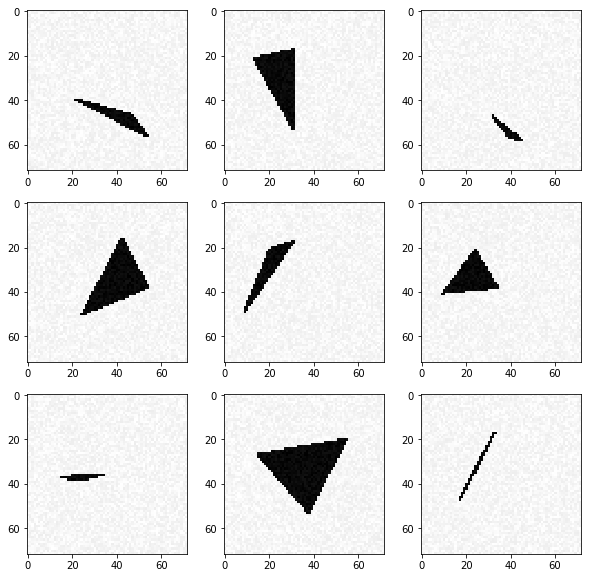

In [39]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

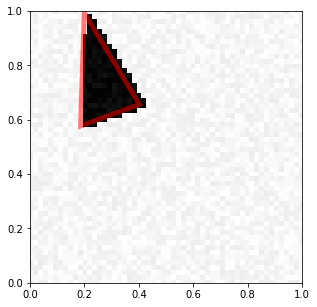

In [40]:
visualize_prediction(X_train[10], Y_train[10])

### <center> Definition of the model </center>

In [41]:
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import Adam

In [42]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 70, 70, 8)         80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 68, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18496)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 110982    
Total params: 112,230
Trainable params: 112,230
Non-trainable params: 0
_________________________________________________________________


### <center> Training </center>

In [43]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])

In [44]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)

In [45]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 3/5
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 4/5
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5/5
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


### <center> Testing </center>

In [46]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 924us/step


[0.015224213699499766, 0.015224213699499766]

As we can see from the evaluation, we suffer from high variance and high bias. Indeed, error on the test set is 1.5 as large as the one on the training test. We do not generalize well, although we added a Dropout layer. Besides error on the train set is still high as human error would be almost zero. For the overfit we could try to add more data, and for the bias problem we could try to add some more layers. Training is already quite long, so we could use a GPU for that.

### <center> Visualization of the predictions </center>

In [47]:
Y_pred = model.predict(X_test)

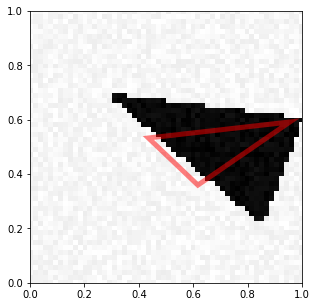

In [48]:
visualize_prediction(X_test[10],Y_pred[10])

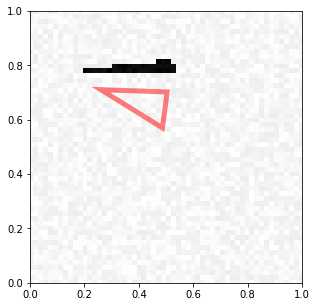

In [49]:
visualize_prediction(X_test[1],Y_pred[1])

# 7) Image Denoising

### <center> Creation of the data </center>

In [50]:
from helpers import generate_dataset_denoising

In [51]:
sample_size = 1000

In [52]:
[X_train, Y_train] = generate_dataset_denoising(sample_size,500)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [53]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = Y_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)

In [54]:
[X_test, Y_test] = generate_dataset_denoising(200,500)

Creating data:
0
100


In [55]:
X_test = X_test.reshape(200,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = Y_test.reshape(200,IMAGE_SIZE,IMAGE_SIZE,1)

### <center>Visualization of the data </center>

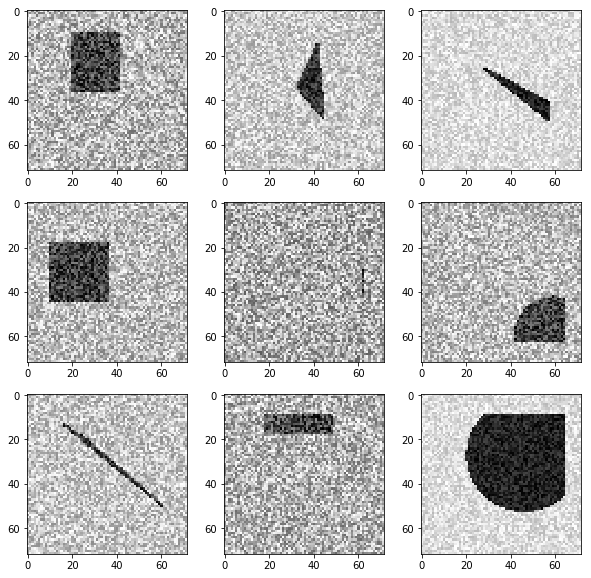

In [56]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [57]:
from keras.layers import UpSampling2D

In [58]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 32)        9248      
__________

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam')

### <center> Model training </center>

In [60]:
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=0)

In [61]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 9s 11ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 2/5
800/800 [==============================] - 9s 11ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 3/5
800/800 [==============================] - 9s 11ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 4/5
800/800 [==============================] - 9s 11ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/5
800/800 [==============================] - 9s 11ms/step - loss: 0.0077 - val_loss: 0.0081


### <center> Testing </center>

In [62]:
model.evaluate(X_test,Y_test)

200/200 [==============================] - 1s 5ms/step


0.008539460487663747

### <center> Visualization of the predictions </center>

In [63]:
Y_pred = model.predict(X_test)

### 9 input images with noise

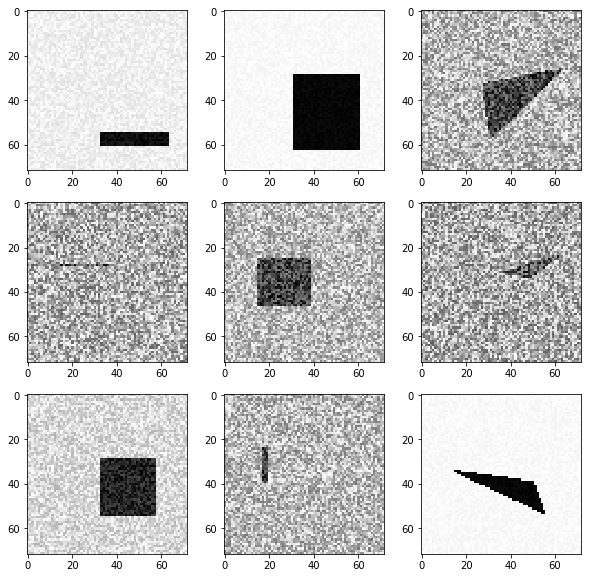

In [64]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### The 9 results after denoising

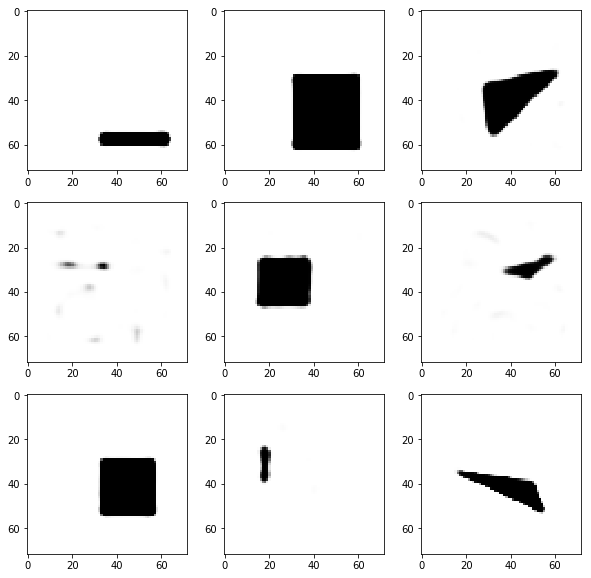

In [65]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(Y_pred[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

The results are very satisfying even for images with a lot of noise as the one in the middle in the last row. However it struggles for the first one of the second line. This is quite understandable given that the triangle is almost invisible.